# Industry Project Data Wrangling and Research

BrainStation Industry Project 12/2/2022
Logan Heine (Data Science)

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Disability Census Data

https://unstats.un.org/unsd/demographic-social/sconcerns/disability/statistics/#!/countries

In [79]:
# This data was pulled by hand from the 'Disability Statistics' page of the United Nations Statistics Division
dis_census_US = {'disability type': ['Visual', 'Auditory', 'Mobility', 'Cognititve', 'Dressing/Bathing', 'Independent Living', 'Any Disability'],
              'count(millions)': [7.462, 11.404, 21.072, 15.421, 8.132, 14.368, 40.734]
}
df_census = pd.DataFrame(dis_census_US)

In [80]:
df_census

,disability type,count(millions)
0,Visual,7.462
1,Auditory,11.404
2,Mobility,21.072
3,Cognititve,15.421
4,Dressing/Bathing,8.132
5,Independent Living,14.368
6,Any Disability,40.734


In [163]:
df_census.to_csv('census_df.csv')

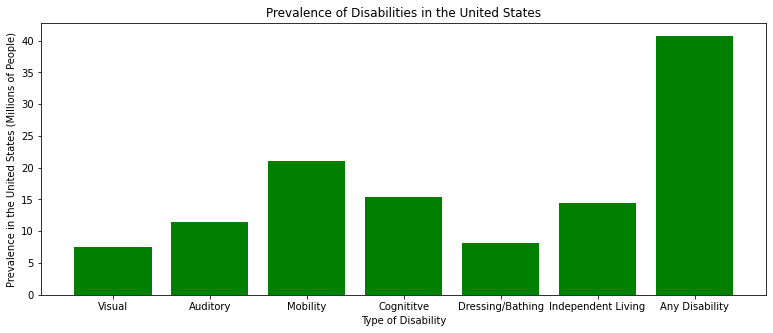

In [164]:
# Making a plot of the data for the presentation
plt.figure(figsize=(13,5))

plt.bar(df_census['disability type'], df_census['count(millions)'], color='green')

plt.xlabel('Type of Disability')

plt.ylabel('Prevalence in the United States (Millions of People)')

plt.ticklabel_format(style='plain', axis='y')

plt.title('Prevalence of Disabilities in the United States')

plt.savefig('disability_prevalence.png')

plt.show()

## Count Vectorization of Google Reviews

In order to gather information about what users like and do not like about google maps, we can run a count vectorizer on review of Google Maps in the app store. By reviewing the words with the highest positive and negative sentiment, we may be able to make inferences about what people like and do not like about google maps.

In [5]:
pip install app_store_scraper

Note: you may need to restart the kernel to use updated packages.


In [56]:
# NOTE: This cell pulls from a server everytime it is run.
from app_store_scraper import AppStore

import json

#gmaps = AppStore(country='us', app_name='google maps', app_id = '585027354')

# Uncomment and run the line below (and above) to pull reviews from the server
#gmaps.review(how_many=2000)

2022-12-01 22:48:19,864 [INFO] Base - [id:585027354] Fetched 380 reviews (1380 fetched in total)
2022-12-01 22:48:25,167 [INFO] Base - [id:585027354] Fetched 780 reviews (1780 fetched in total)
2022-12-01 22:48:45,730 [INFO] Base - [id:585027354] Fetched 880 reviews (1880 fetched in total)
2022-12-01 22:48:51,127 [INFO] Base - [id:585027354] Fetched 1280 reviews (2280 fetched in total)
2022-12-01 22:48:56,483 [INFO] Base - [id:585027354] Fetched 1680 reviews (2680 fetched in total)
2022-12-01 22:49:20,322 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/us/apps/585027354/reviews?l=en-GB&offset=2980&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))
2022-12-01 22:49:20,324 [INFO] Base - [id:585027354] Fetched 1980 reviews (2980 fetched in total)


In [57]:
gdf = pd.DataFrame(gmaps.reviews)
gdf

,date,isEdited,rating,title,review,userName,developerResponse
0,2022-07-31 15:44:59,False,5,Get this app!,This app is amazing! It has everything Apple M...,MapLover6730000,NaN
1,2021-02-01 13:44:27,False,3,Alright,It’s alright. Buggy sometimes even with good s...,Vampballer,NaN
2,2021-10-03 06:22:44,False,3,Head north or south??!!,This app routinely gives directions by saying ...,WaltKen47,NaN
3,2022-10-30 16:36:20,False,3,End of trip.,Love Google Maps! My only complaint is that th...,Bryanpc,NaN
4,2022-05-10 19:46:37,False,3,Navigator,"My iPhone 11, running the latest IOS (15.4.1) ...",My_App_Experience,NaN
...,...,...,...,...,...,...,...
2975,2018-01-24 04:13:32,False,5,Failed me in Elm Grove Wisconsin,GPS was stuck at an intersection. It would not...,newcomer2009,NaN
2976,2018-04-03 02:10:15,False,1,What’s wrong with Google map?,Google map used to be the best map app out the...,Samro21,"{'id': 3348109, 'body': 'Thank you for letting..."
2977,2017-12-27 07:37:25,False,3,Saved Places on My Map are missing,I started to use Google map on iPhone X. Howev...,JacobyWu,"{'id': 2707545, 'body': '2/28/18 Did this reso..."
2978,2018-01-05 14:49:04,False,2,Stopped using when they dropped Apple Watch su...,I do most everything with my Apple Watch. I se...,Spideyoo2,NaN


In [58]:
gdf['rating'].value_counts()

5    1049
1     679
3     497
2     381
4     374
Name: rating, dtype: int64

In [59]:
gdf['rating'] = gdf['rating'].astype(float)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
X = gdf['review']

In [101]:
# Count Vectorizer for the 'Postitive_Review' column

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=10)

# 2. Fit 
bagofwords.fit(X)

# 3. Transform
X_transformed_Pos = bagofwords.transform(X)

In [102]:
df_words = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=X_transformed_Pos.toarray())
display(df_words)

,10,100,11,12,13,14,15,20,2019,2020,...,yes,yesterday,york,young,zero,zone,zoom,zoomed,zooming,zooms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2978,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
df_words.isna().sum().sum()

0

In [104]:
xX = df_words
y = gdf['rating']

In [105]:
X_withconstant = sm.add_constant(xX)

In [106]:
y.dtypes

dtype('float64')

In [107]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_fitted = myregression.fit()

# 3. Looking at the summary / evaluation
myregression_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     3.436
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          6.84e-107
Time:                        23:31:35   Log-Likelihood:                -2922.2
No. Observations:                2980   AIC:                             9388.
Df Residuals:                    1208   BIC:                         2.002e+04
Df Model:                        1771                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6755      0.092     50.761      0.000       4.495       4.856
10                  0.0534      0.119      0.449      0.653      -0.180       0.286
100                 0.5748      0.234      2.455      0.014       0.115       1.034
11                 -0.0120      0.258     -0.046      0.963      -0.519       0.495
12                  0.2229      0.270      0.825      0.410      -0.307       0.753
13                  0.1144      0.253      0.452      0.652      -0.382       0.611
14                 -0.3673      0.308     -1.192      0.234      -0.972       0.237
15                  0.0438      0.228      0.192      0.848      -0.404       0.491
20                  0.0581      0.189      0.307      0.759      -0.313       0.429
2019               -0.3887      0.560     -0.694      0.488      -1.487       0.710
2020                0.2868      0.489      0.587      0.558      -0.673       1.246
2022               -1.1280      0.461     -2.447      0.015      -2.032      -0.224
22                 -0.7665      0.506     -1.516      0.130      -1.758       0.225
24                  0.1346      0.345      0.391      0.696      -0.542       0.811
25                 -0.3596      0.290     -1.240      0.215      -0.929       0.210
30                  0.1440      0.180      0.800      0.424      -0.209       0.497
40                  0.0706      0.276      0.256      0.798      -0.471       0.612
45                  0.2412      0.307      0.787      0.432      -0.360       0.843
50                 -0.0242      0.330     -0.073      0.941      -0.672       0.623
60                 -0.3138      0.363     -0.864      0.387      -1.026       0.398
6s                 -0.5781      0.345     -1.674      0.094      -1.256       0.099
70                  0.1583      0.361      0.439      0.661      -0.550       0.866
75                  0.3898      0.536      0.727      0.467      -0.662       1.442
90                  0.3679      0.358      1.028      0.304      -0.334       1.070
ability            -0.1005      0.157     -0.640      0.522      -0.409       0.208
able                0.0637      0.091      0.698      0.485      -0.115       0.243
absolute           -0.5826      0.376     -1.550      0.121      -1.320       0.155
absolutely          0.0389      0.162      0.241      0.810      -0.279       0.357
accept              0.5070      0.323      1.569      0.117      -0.127       1.141
access              0.0914      0.178      0.513      0.608      -0.258       0.441
accessible          0.4675      0.398      1.175      0.240      -0.313       1.248
accident            0.0114      0.233      0.049      0.961      -0.446       0.469
accidentally        0.3348      0.334      1.003      0.316      -0.320       0.990
accidents          -0.0298      0.274     -0.109      0.913

In [108]:
myregression_fitted.params[1:].index

Index(['10', '100', '11', '12', '13', '14', '15', '20', '2019', '2020',
       ...
       'yes', 'yesterday', 'york', 'young', 'zero', 'zone', 'zoom', 'zoomed',
       'zooming', 'zooms'],
      dtype='object', length=1771)

In [109]:
# Building a dataframe containing the names of each variable along with the logreg model coefficient
word_coefs = pd.DataFrame(
    {"coefficients": myregression_fitted.params[1:]},
    index=myregression_fitted.params[1:].index
).sort_values("coefficients", ascending=False)

In [110]:
Negative_predicting_words = word_coefs.tail(50)
Negative_predicting_words

,coefficients
constant,-0.787137
insane,-0.788690
ups,-0.788909
removing,-0.789921
disappointing,-0.794171
developer,-0.798469
consistently,-0.800458
mess,-0.802390
followed,-0.805768
true,-0.805818


In [111]:
Positive_predicting_words = word_coefs.head(50)
Positive_predicting_words

,coefficients
grocery,1.604352
avail,1.261868
pops,1.247386
known,1.098834
permission,1.063499
firm,1.011635
repair,0.993030
creating,0.992969
present,0.980786
listening,0.935176


In [89]:
chart_df = {'Positive Sentiment': ['Options', 'Including', 'Color', 'Suggestions'],
              'Negative Sentiment': ['Complicated', 'Scrolling', ' ', ' ']
}
df_5 = pd.DataFrame(chart_df)
df_5

,Positive Sentiment,Negative Sentiment
0,Options,Complicated
1,Including,Scrolling
2,Color,
3,Suggestions,


In [115]:
df_words.loc[:,'complicated'].sum()

18

In [114]:
df_words.loc[:,'scrolling'].sum()

22

In [135]:
word_coefs.head()

,coefficients
grocery,1.604352
avail,1.261868
pops,1.247386
known,1.098834
permission,1.063499


In [129]:
df_words.shape

(2980, 1771)

In [141]:
choice_words_list = ('accessible', 'suggestions', 'including', 'color', 'complicated', 'exploring', 'iphones')
choice_words_coeffs = ()
choice_words_counts = ()

In [154]:
choice_words={'words': ['accessible', 'suggestions', 'including', 'color', 'complicated', 'exploring', 'iphones'],
              'coeffs': [],
              'counts': []    
}
choice_words

{'words': ['accessible',
  'suggestions',
  'including',
  'color',
  'complicated',
  'exploring',
  'iphones'],
 'coeffs': [],
 'counts': []}

In [155]:
for word in choice_words['words']:
    choice_words['coeffs'].append(word_coefs.loc[word]['coefficients'])
    choice_words['counts'].append(df_words.loc[:, word].sum())
choice_words

{'words': ['accessible',
  'suggestions',
  'including',
  'color',
  'complicated',
  'exploring',
  'iphones'],
 'coeffs': [0.4675294881425845,
  -0.3151526857721578,
  0.2128048783844526,
  -0.03500091404743877,
  -0.6706420975590307,
  0.6704152267547597,
  -0.806045803110862],
 'counts': [15, 37, 32, 27, 18, 20, 14]}

In [157]:
words_df = pd.DataFrame(choice_words)
words_df

,words,coeffs,counts
0,accessible,0.467529,15
1,suggestions,-0.315153,37
2,including,0.212805,32
3,color,-0.035001,27
4,complicated,-0.670642,18
5,exploring,0.670415,20
6,iphones,-0.806046,14


In [162]:
words_df.to_csv('words_df.csv')